# Lab 2 - ANNDA

In [1]:
import som
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SOM

## Topological Ordering of Animal Species

In [77]:
# Read in data
animals = np.genfromtxt('data/animals.dat', delimiter=',')
X = animals.reshape((32,84))

In [78]:
# Read animal names - rows
f = open('data/animalnames.txt',"r")
animalnames = f.readlines()
animalnames = [name[1:-3] for name in animalnames[:-1]] + [animalnames[-1][1:-1]]
f.close()

In [79]:
# Read attrib names - columns
f = open('data/animalattributes.txt',"r")
attribnames = f.readlines()
attribnames = [name[:-1] for name in attribnames[:-1]] + [attribnames[-1]]
f.close()

In [80]:
# Turn data into dataframe
df = pd.DataFrame(X,columns = attribnames)
df = df.set_index([animalnames]).astype(int)

In [81]:
df

,antlered,articulations,barks,big,bigears,biting,black,blood,brown,climbing,...,twowinged,warmblooded,waterliving,verybig,verylongears,verysmall,white,wingless,wings,yellow
antelop,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
ape,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
bat,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
bear,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
beetle,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
butterfly,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
camel,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
cat,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
crocodile,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
dog,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


### 1D Output Topology

In [82]:
# Define SOM architecture
in_dim = len(attribnames)
out_shape = (50,1) # Output topology
somnet = som.SOM(in_dim,out_shape,is_circular=False)

In [83]:
# Initialize weights
W_init = np.random.uniform(0, 1, size=(somnet.in_dim, somnet.out_shape[0], somnet.out_shape[1]))
somnet.initialize_weights(np.copy(W_init))

In [84]:
# Train weights
lr = 0.2 # Step size
n_epochs = 20 # Number of epochs
init_th = 20 # Manhattan initial distance threshold for neighbourhood
somnet.train(X.T,lr,n_epochs,init_th)

In [85]:
# Find output topology
winners = somnet.output_topology(X.T)
winners = np.array([winner[0] for winner in winners])
sorting_indices = np.argsort(winners)
winners_sorted = winners[sorting_indices]
winners_sorted_names = [animalnames[i] for i in sorting_indices]

In [86]:
winners_sorted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
winners_sorted_names

['antelop',
 'skunk',
 'seaturtle',
 'rat',
 'rabbit',
 'pig',
 'penguin',
 'pelican',
 'ostrich',
 'moskito',
 'lion',
 'kangaroo',
 'hyena',
 'housefly',
 'horse',
 'grasshopper',
 'giraffe',
 'frog',
 'elephant',
 'duck',
 'dragonfly',
 'dog',
 'crocodile',
 'cat',
 'camel',
 'butterfly',
 'beetle',
 'bear',
 'bat',
 'ape',
 'spider',
 'walrus']

### 2D Output Topology

In [88]:
# Define SOM architecture
in_dim = len(attribnames)
out_shape = (9,9) # Output topology
somnet = som.SOM(in_dim,out_shape,is_circular=False)

In [89]:
# Initialize weights
W_init = np.random.uniform(0, 1, size=(somnet.in_dim, somnet.out_shape[0], somnet.out_shape[1]))
somnet.initialize_weights(np.copy(W_init))

In [90]:
# Train weights
lr = 0.2 # Step size
n_epochs = 100 # Number of epochs
init_th = 5 # Manhattan initial distance threshold for neighbourhood
somnet.train(X.T,lr,n_epochs,init_th)

In [91]:
# Find output topology
winners = somnet.output_topology(X.T)
winners_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),-1,dtype='int')
animals_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),'-',dtype='object')
i = 0
for winner in winners :
    winners_grid[winner] = i
    animals_grid[winner] = animalnames[i]
    i += 1

In [92]:
pd.DataFrame(animals_grid)

,0,1,2,3,4,5,6,7,8
0,spider,-,housefly,-,-,-,-,-,lion
1,-,dragonfly,beetle,-,-,-,-,-,-
2,-,-,-,grasshopper,-,-,-,-,-
3,moskito,-,-,-,-,skunk,-,-,-
4,pelican,frog,butterfly,-,-,-,-,-,kangaroo
5,ostrich,seaturtle,dog,rabbit,-,-,-,pig,horse
6,penguin,crocodile,-,-,bear,-,hyena,-,giraffe
7,ape,walrus,rat,-,-,-,-,-,-
8,-,cat,elephant,-,-,-,-,-,antelop


## Cyclic Tour

In [93]:
# Cities position data
kth_building_pos = [[0.4000, 0.4439],
                    [0.2439, 0.1463],
                    [0.1707, 0.2293],
                    [0.2293, 0.7610],
                    [0.5171, 0.9414],
                    [0.8732, 0.6536],
                    [0.6878, 0.5219],
                    [0.8488, 0.3609],
                    [0.6683, 0.2536],
                    [0.6195, 0.2634]]
building_names = ['Q','U','B','K','L','E','A','C','M','N']
attrib_names = ['x_coord','y_coord']
X = np.array(kth_building_pos)

In [94]:
# Turn data into dataframe
df = pd.DataFrame(X,columns = attrib_names)
df = df.set_index([building_names])
df.index.name = 'KTH buildings'
df

,x_coord,y_coord
KTH buildings,,
Q,0.4000,0.4439
U,0.2439,0.1463
B,0.1707,0.2293
K,0.2293,0.7610
L,0.5171,0.9414
E,0.8732,0.6536
A,0.6878,0.5219
C,0.8488,0.3609
M,0.6683,0.2536


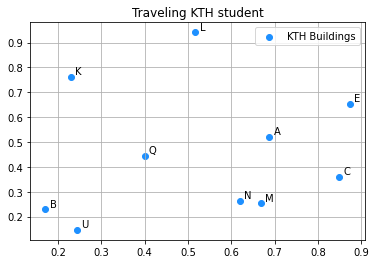

In [95]:
# Plot cities
som.plot_cities(X.T,building_names)

### 1D Output Topology

In [96]:
# Define SOM architecture
in_dim = len(attrib_names)
out_shape = (20,1) # Output topology
somnet = som.SOM(in_dim,out_shape,is_circular=True)

In [97]:
# Initialize weights
W_init = np.random.uniform(0, 1, size=(somnet.in_dim, somnet.out_shape[0], somnet.out_shape[1]))
somnet.initialize_weights(np.copy(W_init))

In [98]:
# Train weights
lr = 0.2 # Step size
n_epochs = 50 # Number of epochs
init_th = 3 # Manhattan initial distance threshold for neighbourhood
somnet.train(X.T,lr,n_epochs,init_th)

In [99]:
# Find output topology
winners = somnet.output_topology(X.T)
winners = np.array([winner[0] for winner in winners])
sorting_indices = np.argsort(winners)
winners_sorted = winners[sorting_indices]
winners_sorted_names = [building_names[i] for i in sorting_indices]

In [100]:
winners_sorted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
winners_sorted_names

['Q', 'U', 'B', 'K', 'L', 'E', 'A', 'C', 'M', 'N']

In [102]:
# Create traveling KTH student path
path = X.T[:,sorting_indices]

In [103]:
# Calculate path length
path_length = som.calculate_perimeter(path)
path_length

2.778215287368279

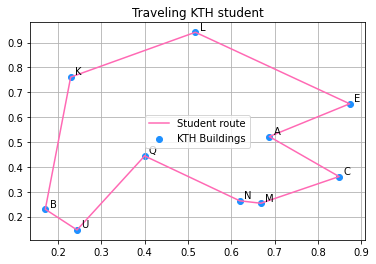

In [104]:
# Plot traveling KTH student route
som.plot_cities_route(X.T,path,building_names)

## Votes of MPs

In [105]:
# Read in data
animals = np.genfromtxt('data/votes.dat', delimiter=',')
X = animals.reshape((349,31))

In [106]:
# Read animal names - rows
f = open('data/mpnames.txt',"r",encoding='latin-1')
mpnames = f.readlines()
mpnames = [name[:-1] for name in mpnames]
f.close()

In [107]:
# Read attrib names - columns
attribnames = ['vote'+str(i+1) for i in range(31)]

In [108]:
# Read parties names
f = open('data/mpparty.dat',"r",encoding='latin-1')
partiesids = f.readlines()
partiesids = [int(id[:-1]) for id in partiesids]
parties_dict = {
    0: 'no_party',
    1: 'm',
    2: 'fp',
    3: 's',
    4: 'v',
    5: 'mp',
    6: 'kd',
    7: 'c'
}
partiesnames = [parties_dict[id] for id in partiesids]
f.close()

In [109]:
# Read sexes names
f = open('data/mpsex.dat',"r",encoding='latin-1')
sexids = f.readlines()
sexids = [int(id[:-1]) for id in sexids]
sex_dict = {
    0: 'male',
    1: 'female'
}
sexnames = [sex_dict[id] for id in sexids]
f.close()

In [110]:
# Read district ids
f = open('data/mpdistrict.dat',"r",encoding='latin-1')
districtids = f.readlines()
districtids = [int(id[:-1]) for id in districtids]
f.close()

In [111]:
# Turn data into dataframe
df = pd.DataFrame(X,columns = attribnames)
df = df.set_index([mpnames,sexnames,partiesnames,districtids])
df

,,,,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,...,vote22,vote23,vote24,vote25,vote26,vote27,vote28,vote29,vote30,vote31
Skårman Carl-Erik,male,m,1,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,1.0,0.0,1.0,0.5,0.5,1.0,0.0,0.5,0.0,1.0
Romanus Gabriel,male,fp,1,0.0,1.0,1.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,1.0,0.0,0.0,1.0,0.5,1.0,1.0,0.0,0.5,0.0
Odenberg Mikael,male,m,1,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,0.5,0.5,0.5,0.5,0.5,1.0,0.0,0.5,0.0,1.0
Järrel Henrik S,male,m,1,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,1.0,0.0,1.0,0.5,0.5,1.0,0.0,0.5,0.0,1.0
Lindgren Sylvia,female,s,1,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Åström Karin,female,s,29,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5
Gidblom Birgitta,female,s,29,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5
Öberg Maria,female,s,29,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5
Hammarbergh Krister,male,m,29,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5


### 1D Output Topology

In [112]:
# Define SOM architecture
in_dim = len(attribnames)
out_shape = (500,1) # Output topology
somnet = som.SOM(in_dim,out_shape,is_circular=False)

In [113]:
# Initialize weights
W_init = np.random.uniform(0, 1, size=(somnet.in_dim, somnet.out_shape[0], somnet.out_shape[1]))
somnet.initialize_weights(np.copy(W_init))

In [114]:
# Train weights
lr = 0.2 # Step size
n_epochs = 100 # Number of epochs
init_th = 50 # Manhattan initial distance threshold for neighbourhood
somnet.train(X.T,lr,n_epochs,init_th)

In [115]:
# Find output topology
winners = somnet.output_topology(X.T)
winners = np.array([winner[0] for winner in winners])
sorting_indices = np.argsort(winners)
winners_sorted = winners[sorting_indices]
winners_sorted_names = [mpnames[i] for i in sorting_indices]

In [116]:
winners_sorted_names

['Skårman Carl-Erik',
 'Nenes Christina',
 'Vänerlöv Ingemar',
 'Nyström Elizabeth',
 'Söderqvist Nils-Erik',
 'Feltzing Barbro',
 'Bohlin Olsson Britt',
 'Forslund Kenneth G',
 'Bråkenhielm Catharina',
 'Tysklind Lars',
 'Jönsson Mona',
 'Aronson Marita',
 'Larsson Jan-Olof',
 'Torstensson Åsa',
 'Runegrund Rosita',
 'Berglund Nilsson Mona',
 'Olsson Kent',
 'René Inger',
 'Dinamarca Rossana',
 'Brodén Anita',
 'Jonsson Peter',
 'Qarlsson Annika',
 'Johansson Ann-Kristine',
 'Lander Jarl',
 'Widegren Cecilia',
 'Winbäck Christer',
 'Ohlsson Carina',
 'Ahlin Urban',
 'Green Monica',
 'Rosengren Per',
 'Bäckström Lars',
 'Gustafsson Holger',
 'Nordström Kjell',
 'Västerteg Claes',
 'Sjösten Ulf',
 'Lindgren Else-Marie',
 'Ekström Anne-Marie',
 'Fransson Sonja',
 'Ekholm Berndt',
 'Kjörnsberg Arne',
 'Carlsson Birgitta',
 'Nilsson Lennart',
 'Darvik Axel',
 'Wigström Cecilia',
 'Kollmats Lennart',
 'Hoff Hans',
 'Sahlberg Pär Axel',
 'Westerlund Panke Majléne',
 'Eriksson Alf',
 'Adelsbo

### 2D Output Topology

In [117]:
# Define SOM architecture
in_dim = len(attribnames)
out_shape = (10,10) # Output topology
somnet = som.SOM(in_dim,out_shape,is_circular=False)

In [118]:
# Initialize weights
W_init = np.random.uniform(0, 1, size=(somnet.in_dim, somnet.out_shape[0], somnet.out_shape[1]))
somnet.initialize_weights(np.copy(W_init))

In [119]:
# Train weights
lr = 0.2 # Step size
n_epochs = 100 # Number of epochs
init_th = 5 # Manhattan initial distance threshold for neighbourhood
somnet.train(X.T,lr,n_epochs,init_th)

In [125]:
# Find output topology
winners = somnet.output_topology(X.T)
winners_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),'-',dtype='object')
mp_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),'-',dtype='object')
sex_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),'-',dtype='object')
parties_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),'-',dtype='object')
district_grid = np.full((somnet.out_shape[0],somnet.out_shape[1]),'-',dtype='object')
i = 0
for winner in winners :
    winners_grid[winner] = i
    mp_grid[winner] = mpnames[i]
    sex_grid[winner] = sexnames[i]
    parties_grid[winner] = partiesnames[i]
    district_grid[winner] = districtids[i]
    i += 1

In [126]:
pd.DataFrame(mp_grid)

,0,1,2,3,4,5,6,7,8,9
0,Nordén Marie,-,Öberg Maria,Israelsson Margareta,Lilja Lars,-,Högman Berit,-,-,Larsson Håkan
1,-,Wibe Sören,-,Granström Per Erik,-,Holma Siv,-,Västerteg Claes,-,-
2,Abramsson Karl Gustav,-,Kristiansson Karlstedt Kerstin,-,Lindholm Jan,-,-,Johansson Anita,Johnsson Jeppe,Brodén Anita
3,Fagerström Ann-Marie,Pärssinen Raimo,-,Fridolin Gustav,Hedström Lotta,Thorborg Karin,Dinamarca Rossana,Olofsson Maud,Ångström Yvonne,Franzén Mia
4,-,-,Björnlod Leif,-,Eriksson Peter,-,Larsson Maria,Lindgren Ulrik,-,Aronson Marita
5,-,Gustavsson Lennart,-,Sköld Jansson Camilla,-,Marcelind Ragnwi,-,Flyborg Eva,-,-
6,Rådström Britta,-,Bäckström Lars,Moberg Carina,-,-,Wälivaara Erling,-,Elmsäter-Svärd Catharina,-
7,Einarsson Mats,Berglund Nilsson Mona,-,-,-,-,-,Hammarbergh Krister,-,Norinder Patrik
8,Sellén Birgitta,-,-,-,-,Patriksson Runar,Sundell Ola,-,Sjösten Ulf,-
9,Johansson Kenneth,-,-,-,Grönlund Krantz Anna,Nordmark Gunnar,-,Axén Gunnar,-,Löfgren Ulla


In [127]:
pd.DataFrame(sex_grid)

,0,1,2,3,4,5,6,7,8,9
0,female,-,female,female,male,-,female,-,-,male
1,-,male,-,male,-,female,-,male,-,-
2,male,-,female,-,male,-,-,female,male,female
3,female,male,-,male,female,female,female,female,female,female
4,-,-,male,-,male,-,female,male,-,female
5,-,male,-,female,-,female,-,female,-,-
6,female,-,male,female,-,-,male,-,female,-
7,male,female,-,-,-,-,-,male,-,male
8,female,-,-,-,-,male,male,-,male,-
9,male,-,-,-,female,male,-,male,-,female


In [128]:
pd.DataFrame(parties_grid)

,0,1,2,3,4,5,6,7,8,9
0,s,-,s,s,s,-,s,-,-,c
1,-,s,-,s,-,v,-,c,-,-
2,s,-,s,-,mp,-,-,s,m,fp
3,s,s,-,mp,mp,v,v,c,fp,fp
4,-,-,mp,-,mp,-,kd,kd,-,fp
5,-,v,-,v,-,kd,-,fp,-,-
6,s,-,v,s,-,-,kd,-,m,-
7,v,s,-,-,-,-,-,m,-,m
8,c,-,-,-,-,fp,m,-,m,-
9,c,-,-,-,fp,fp,-,m,-,m


In [129]:
pd.DataFrame(district_grid)

,0,1,2,3,4,5,6,7,8,9
0,27,-,29,23,28,-,21,-,-,27
1,-,28,-,24,-,29,-,19,-,-
2,28,-,26,-,24,-,-,2,10,18
3,8,25,-,1,25,23,18,28,28,2
4,-,-,21,-,29,-,6,24,-,17
5,-,28,-,27,-,25,-,16,-,-
6,28,-,17,2,-,-,29,-,2,-
7,2,17,-,-,-,-,-,29,-,25
8,26,-,-,-,-,21,27,-,19,-
9,24,-,-,-,29,7,-,5,-,28
